<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_diagram_Interactiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interaktív függvények és ábrák

Az alábbiakban vizsgáljunk meg egy egyszerű módszert arra, hogy hogyan tehetjük Python-függvényeinket interaktívvá!
Ehhez az `ipywidgets` csomag lesz segítségünkre!

In [1]:
%pylab inline
from ipywidgets import *  # az interaktivitásért felelős csomag

Populating the interactive namespace from numpy and matplotlib


Mostanra már tudjuk, hogy hogyan ábrázoljunk egy matematikai függvényt:

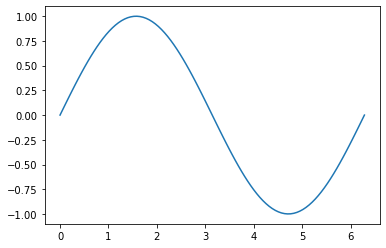

In [2]:
t=linspace(0,2*pi,100);
plot(t,sin(t))

Írjunk egy függvényt, ami egy megadott frekvenciájú jelet rajzol ki!

In [0]:
def freki(omega):    
    plot(t,sin(omega*t))

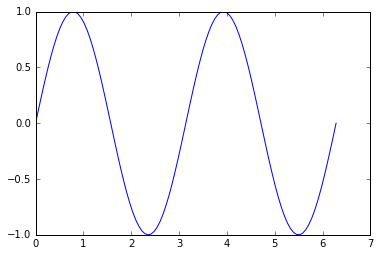

In [0]:
freki(2.0)

Most jön a varázslat! Az `interact()` függvény segítségével interaktívvá tehetjük a fent definiált függvényünket!

In [4]:
interact(freki,omega=(0,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='omega', max=10.0), Output()), _dom_classes=('widget-…

Nézzük meg egy kicsit közelebbről, hogy is működik ez az `interact()` konstrukció! Definiáljunk ehhez először egy nagyon egyszerű függvényt!

In [0]:
def func(x):
     print(x)

Az interact egy olyan függvény, amely az első paramétereként egy függvényt vár, és kulcsszavakként várja a függvény bemenő paramétereit! Amit visszaad, az egy interaktív **widget**, ami lehet sokfajta, de alapvetően azt a célt szolgálja, hogy a **func** függvényt kiszolgálja. Annak ad egy bemenő paramétert, lefuttatja, majd vár, hogy a felhasználó újra megváltoztassa az állapotot.
Ha a kulcsszavas argumentumnak zárójelbe írt egész számokat adunk meg, akkor egy egész számokon végigmenő csúszkát kapunk:

In [6]:
interact(func,x=(0,10)); 

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

Ha egy `bool` értéket adunk meg, akkor egy pipálható dobozt:

In [0]:
interact(func,x=False);

True


Ha egy általános listát adunk meg, akkor egy legördülő menüt kapunk:

In [7]:
interact(func,x=['hétfő','kedd','szerda']);

interactive(children=(Dropdown(description='x', options=('hétfő', 'kedd', 'szerda'), value='hétfő'), Output())…

Ha a sima zárójelbe írt számok nem egészek (legalább az egyik) akkor egy float csúszkát kapunk:

In [8]:
interact(func,x=(0,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

Ha pontosan specifikálni szeretnénk, hogy milyen interaktivitást akarunk, akkor azt az alábbiak szerint tehetjük meg, 


egész csúszka$\rightarrow$IntSlider()

float csúszka$\rightarrow$FloatSlider()

legördülő menü$\rightarrow$Dropdown()

pipa doboz$\rightarrow$Checkbox()

szövegdoboz$\rightarrow$Text()

Ezt alább néhány példa illusztrálja:

In [9]:
interact(func,x=IntSlider(min=0,max=10,step=2,value=2,description='egesz szamos csuszka x='));

interactive(children=(IntSlider(value=2, description='egesz szamos csuszka x=', max=10, step=2), Output()), _d…

In [10]:
interact(func,x=FloatSlider(min=0,max=10,step=0.01,value=2,description='float szamos csuszka x='));

interactive(children=(FloatSlider(value=2.0, description='float szamos csuszka x=', max=10.0, step=0.01), Outp…

In [11]:
interact(func,x=Dropdown(options=['Hétfő','Kedd','Szerda'],description='legörülő x='));

interactive(children=(Dropdown(description='legörülő x=', options=('Hétfő', 'Kedd', 'Szerda'), value='Hétfő'),…

In [12]:
interact(func,x=Checkbox());

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

In [13]:
interact(func,x=Text());

interactive(children=(Text(value='', description='x'), Output()), _dom_classes=('widget-interact',))

Ha egy függvényt sokáig tart kiértékelni, akkor `interact` helyett érdemes `interact_manual`-t használni. Ez csak akkor futtatja le a függvényt, ha a megjelenő gombot megnyomjuk.

In [14]:
interact_manual(func,x=(0,10));

interactive(children=(IntSlider(value=5, description='x', max=10), Button(description='Run Interact', style=Bu…

A widgetekről [bővebben itt](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb) található több információ. Végül nézünk meg egy több változós interactot!

In [0]:
t=linspace(0,2*pi,100);
def oszci(A,omega,phi,szin):
    plot(t,A*sin(omega*t+phi),color=szin)
    plot(pi,A*sin(omega*pi+phi),'o')
    xlim(0,2*pi)
    ylim(-3,3)
    xlabel('$t$',fontsize=20)
    ylabel(r'$A\,\sin(\omega t+\varphi)$',fontsize=20)
    grid(True)

In [16]:
interact(oszci,
            A    =FloatSlider(min=1,max=2,step=0.1,value=2,description='A'),
            omega=FloatSlider(min=0,max=10,step=0.1,value=2,description=r'$\omega$'), 
            phi  =FloatSlider(min=0,max=2*pi,step=0.1,value=0,description=r'$\varphi$'),
            szin =Dropdown(options=['red','green','blue','darkcyan'],description='szín'));

interactive(children=(FloatSlider(value=2.0, description='A', max=2.0, min=1.0), FloatSlider(value=2.0, descri…